<a href="https://colab.research.google.com/github/hampanass/FML_Labs/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Definition
- Housing Finance company deals with home loans.
- The dataset is provided to identify the customer segments that are eligible for loan amount so that they can specifically target these customers.

## Data Acquisition


**The dataset contains following 13 features information**

* Loan_ID	Unique Loan ID
* Gender	Male/ Female
* Married	Applicant married (Y/N)
* Dependents	Number of dependents
* Education	Applicant Education (Graduate/ Under Graduate)
* Self_Employed	Self employed (Y/N)
* ApplicantIncome	Applicant income
* CoapplicantIncome	Coapplicant income
* LoanAmount	Loan amount in thousands
* Loan_Amount_Term	Term of loan in months
* Credit_History	credit history meets guidelines
* Property_Area	Urban/ Semi Urban/ Rural
* Loan_Status	(Target) Loan approved (Y/N)

## Data Preparation
- Data Exploration
- Data Cleaning
- Missing value treatments
- Outlier handling
- Data encoding techniques
- Feature engineering
- Challenges of high dimensionality
- Dimension reduction using principal component analysis

In [1]:
#Loading Packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Loan.csv")
data.head(30)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Data Exploration

In [3]:
data.shape

(614, 13)

In [4]:
print('number of rows', data.shape[0])
print('number of columns',data.shape[1])

number of rows 614
number of columns 13


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [8]:
print('integer type data', data.select_dtypes(include='int64').shape)

integer type data (614, 1)


In [9]:
# how many columns are of integer type
print('number of columns of integer type', data.select_dtypes(include='int64').shape[1])
# how many columns are of object type
print('number of columns of object type', data.select_dtypes(include='object').shape[1])
# how many columns are of float type
print('number of columns of float type', data.select_dtypes(include='float64').shape[1])

number of columns of integer type 1
number of columns of object type 8
number of columns of float type 4


In [10]:
# Summary of numeric (int and float) data

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# Summary of object data

data.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [12]:
# Aggregation by grouping
# Frequency

data['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [13]:
# Aggregation by grouping
# Frequency

data['Married'].value_counts()

,count
Married,
Yes,398
No,213


In [14]:
# Aggregation by grouping
# Frequency

data['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [15]:
# Aggregation by grouping
# Frequency

data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [16]:
# Aggregation by grouping
# Frequency

data['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [17]:
# Relative Frequency

data['Gender'].value_counts(normalize=True)

,proportion
Gender,
Male,0.813644
Female,0.186356


In [18]:
# Identify duplicate data
# data[data.duplicated()==True]
data[data.duplicated()].sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0


## Data Visualization

## Univariate Analysis

## Numerical Attribute Analysis :Histogram

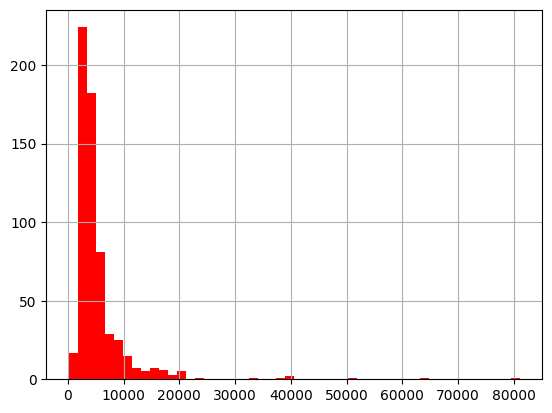

In [19]:
data['ApplicantIncome'].hist(bins=50,color='red')
plt.show()

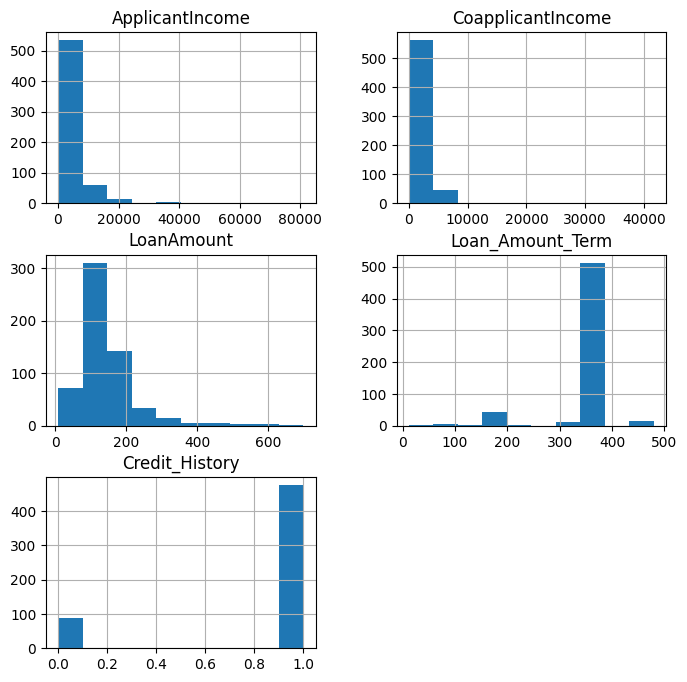

In [20]:
data.hist(figsize=(8,8))
plt.show()

<Axes: xlabel='ApplicantIncome'>

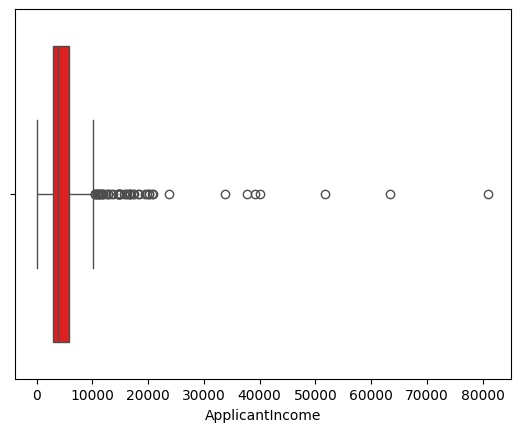

In [21]:
sns.boxplot(data=data, x='ApplicantIncome',color="red")

In [22]:
# identify the unique values
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [23]:
data.drop (['Loan_ID'],inplace=True,axis=1)
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Male', 'Female', nan],
 'Married': ['No', 'Yes', nan],
 'Dependents': ['0', '1', '2', '3+', nan],
 'Education': ['Graduate', 'Not Graduate'],
 'Self_Employed': ['No', 'Yes', nan],
 'Property_Area': ['Urban', 'Rural', 'Semiurban'],
 'Loan_Status': ['Y', 'N']}

## Bivariate Analysis using visualization

## Stacked Histogram

In [24]:
Gdr=pd.crosstab(data['Gender'],data['Loan_Status'])
Gdr

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Axes: xlabel='Gender'>

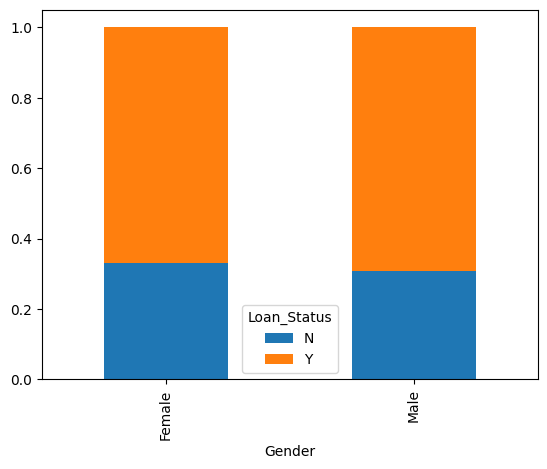

In [25]:
Gdr.div(Gdr.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [26]:
Edu=pd.crosstab(data['Education'],data['Loan_Status'])
Edu

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [27]:
Edu.div(Edu.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


Text(0, 0.5, 'Rel.Frequency')

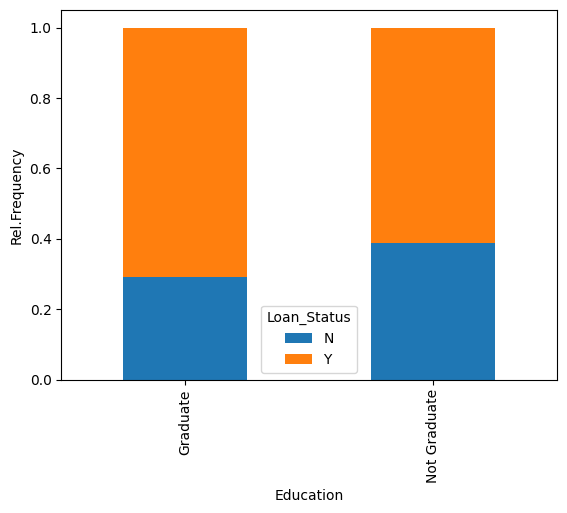

In [28]:

Edu.div(Edu.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Education")
plt.ylabel("Rel.Frequency")

In [29]:
data.groupby('Gender')['Loan_Status'].count()

,Loan_Status
Gender,
Female,112
Male,489


<Axes: xlabel='Gender'>

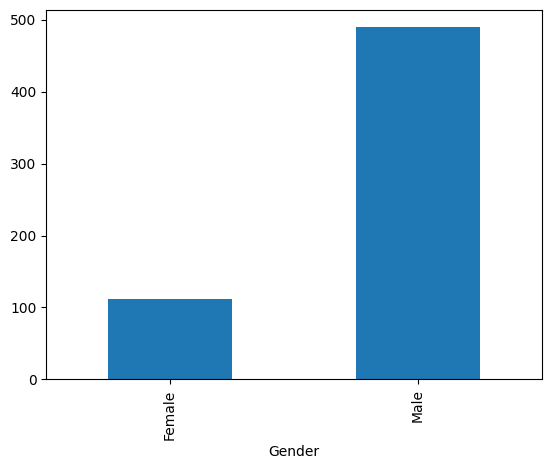

In [30]:
data.groupby('Gender')['Loan_Status'].count().plot(kind='bar')

## Data Cleaning

## Missing Value


In [31]:
# Identify the missing values under each column
data.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [32]:
# Total missing values
data.isnull().sum().sum()

np.int64(149)

In [33]:
# % missing values
(data.isnull().sum().sum()/len(data))*100

np.float64(24.267100977198698)

In [34]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000


In [35]:
data['Credit_History'].dtype

dtype('float64')

In [36]:
data['Self_Employed'].dtype


dtype('O')

## impute the missing data

In [37]:
# percentage of missing data whandling based on the domain knowledge

# <5% - remove the rows which are having missing values (Deletion)

# 5% to 10% - impute using mean, median (numeric data) or mode(non-numeric data)
# 5% to 10% - forward fill/backward fill (is used for time-series data)

# 10% to 20% - regression, KNN imputation, interpolation

# >20% - drop that column / attribute based on the relevance
# >20% - factorization, random techniques

<Axes: >

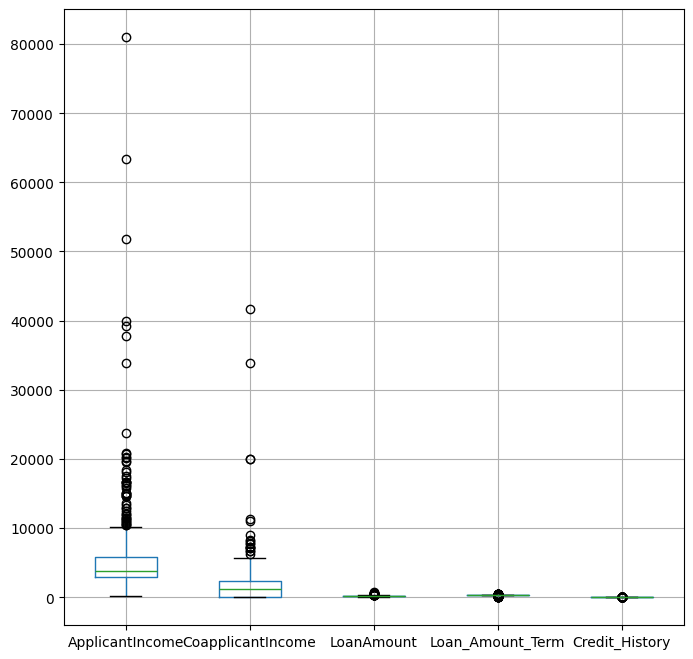

In [38]:
# Impute with mean provided outliers are not there
data.boxplot(figsize=(8,8))

In [39]:
# Copy the data to a new dataframe
data1=data

In [40]:
# use median to impute the missing values for numeric attributes
data1['LoanAmount'].fillna(data1['LoanAmount'].median(),inplace=True)
data1['Credit_History'].fillna(data1['Credit_History'].median(),inplace=True)
data1['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].median(),inplace=True)

In [41]:
data1.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [42]:
data1.isnull().sum().sum()

np.int64(63)

In [43]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [44]:
# use mode to impute the missing values for object type attributes
data1['Gender'].fillna(data1['Gender'].mode()[0],inplace=True)
data1['Married'].fillna(data1['Married'].mode()[0],inplace=True)
data1['Dependents'].fillna(data1['Dependents'].mode()[0],inplace=True)
data1['Self_Employed'].fillna(data1['Self_Employed'].mode()[0],inplace=True)

In [45]:
data1['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [46]:
data1.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


## Discrepancies / Inconsistencies in data

In [47]:
# Repalce 3+ with 4
data1['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [48]:
data1=data1.replace(to_replace='3+',value=4)

In [49]:
data1['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


# Feature Engineering

- Create a new feature / attribute
- Transform the existing feature
- Feature can be numeric, categorical

## Variable Transformation
- Categorical Variable Transformations -Encoding Techniques
- Numeric Variable Transformation - Standardization and Normalization

## Apply Encoding techniques on loan dataset
- to convert categorical to numerical

In [50]:
data1.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [51]:
data1['Gender'].tail(10)


,Gender
604,Female
605,Male
606,Male
607,Male
608,Male
609,Female
610,Male
611,Male
612,Male
613,Female


In [52]:
# Binary Encoding Technique using map() function
Gender_map={'Male':0,'Female':1}
data1['Gender'] = data1['Gender'].map(Gender_map)

In [53]:
data1['Gender'].tail(10)

,Gender
604,1
605,0
606,0
607,0
608,0
609,1
610,0
611,0
612,0
613,1


In [54]:
data1["Property_Area"].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [55]:
data1["Dependents"].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


In [56]:
data1["Dependents"]=pd.to_numeric(data1["Dependents"])
data1["Dependents"].dtype

dtype('int64')

In [57]:
Married_map={"Yes":1,"No":0}
Education_map={"Graduate":1,"Not Graduate":0}
Self_Employed_map={"Yes":1,"No":0}
Property_Area_map={"Rural":0,"Urban":1,"Semiurban":2}
Loan_Status_map={'Y':1,'N':0}

In [58]:
data1['Married'] = data1['Married'].map(Married_map)
data1['Education'] = data1['Education'].map(Education_map)
data1['Self_Employed'] = data1['Self_Employed'].map(Self_Employed_map)
data1['Property_Area'] = data1['Property_Area'].map(Property_Area_map)
data1['Loan_Status'] = data1['Loan_Status'].map(Loan_Status_map)

In [59]:
data1.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [60]:
data1.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
6,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
7,0,1,4,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,1,1
9,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0


# Normalization and Standardization

In [61]:
# Normalization is the process of scaling the individual samples to have a uniform norm.

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [63]:
# Standardization is the process of transforming data to have a mean of 0 and a standard deviation of 1.

scaler=StandardScaler()

data11=scaler.fit_transform(data1)
print(data11)

[[-0.47234264 -1.37208932 -0.6827291  ...  0.41173269 -0.10798877
   0.67451931]
 [-0.47234264  0.72881553  0.14245922 ...  0.41173269 -1.33586108
  -1.48253724]
 [-0.47234264  0.72881553 -0.6827291  ...  0.41173269 -0.10798877
   0.67451931]
 ...
 [-0.47234264  0.72881553  0.14245922 ...  0.41173269 -0.10798877
   0.67451931]
 [-0.47234264  0.72881553  0.96764754 ...  0.41173269 -0.10798877
   0.67451931]
 [ 2.11710719 -1.37208932 -0.6827291  ... -2.42876026  1.11988354
  -1.48253724]]


In [64]:
data11=pd.DataFrame(data11)
data11.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.472343,-1.372089,-0.682729,0.528362,-0.392601,0.072991,-0.554487,-0.211241,0.273231,0.411733,-0.107989,0.674519
1,-0.472343,0.728816,0.142459,0.528362,-0.392601,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-1.335861,-1.482537
2,-0.472343,0.728816,-0.682729,0.528362,2.547117,-0.393747,-0.554487,-0.948996,0.273231,0.411733,-0.107989,0.674519
3,-0.472343,0.728816,-0.682729,-1.892641,-0.392601,-0.462062,0.251980,-0.306435,0.273231,0.411733,-0.107989,0.674519
4,-0.472343,-1.372089,-0.682729,0.528362,-0.392601,0.097728,-0.554487,-0.056551,0.273231,0.411733,-0.107989,0.674519
5,-0.472343,0.728816,0.967648,0.528362,2.547117,0.002218,0.880600,1.442758,0.273231,0.411733,-0.107989,0.674519
6,-0.472343,0.728816,-0.682729,-1.892641,-0.392601,-0.503019,-0.035995,-0.603917,0.273231,0.411733,-0.107989,0.674519
7,-0.472343,0.728816,2.618024,0.528362,-0.392601,-0.387850,0.301914,0.145737,0.273231,-2.428760,1.119884,-1.482537
8,-0.472343,0.728816,0.967648,0.528362,-0.392601,-0.228939,-0.032575,0.264730,0.273231,0.411733,-0.107989,0.674519
9,-0.472343,0.728816,0.142459,0.528362,-0.392601,1.218457,3.196713,2.418499,0.273231,0.411733,1.119884,-1.482537


## Bivaraite Analysis

- Examine the realtionship between two variables in the dataset
- The variables are independent and dependent (target Vaiable)

## Correlation

In [65]:
corrs = data11.corr()
corrs

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,-0.364569,-0.165877,0.045364,0.000525,-0.058809,-0.082912,-0.106904,0.074030,-0.009170,0.109521,-0.017987
1,-0.364569,1.000000,0.308408,-0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.007281,0.091478
2,-0.165877,0.308408,1.000000,-0.059001,0.048028,0.134080,0.034780,0.170584,-0.104059,-0.047203,-0.002768,0.002474
3,0.045364,-0.012304,-0.059001,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.066740,0.085884
4,0.000525,0.004489,0.048028,0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.007124,-0.003700
5,-0.058809,0.051708,0.134080,0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.017321,-0.004710
6,-0.082912,0.075948,0.034780,0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.019087,-0.059187
7,-0.106904,0.146546,0.170584,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.027714,-0.033214
8,0.074030,-0.100912,-0.104059,0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,0.016086,-0.022549
9,-0.009170,0.010938,-0.047203,0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.033102,0.540556


<Axes: >

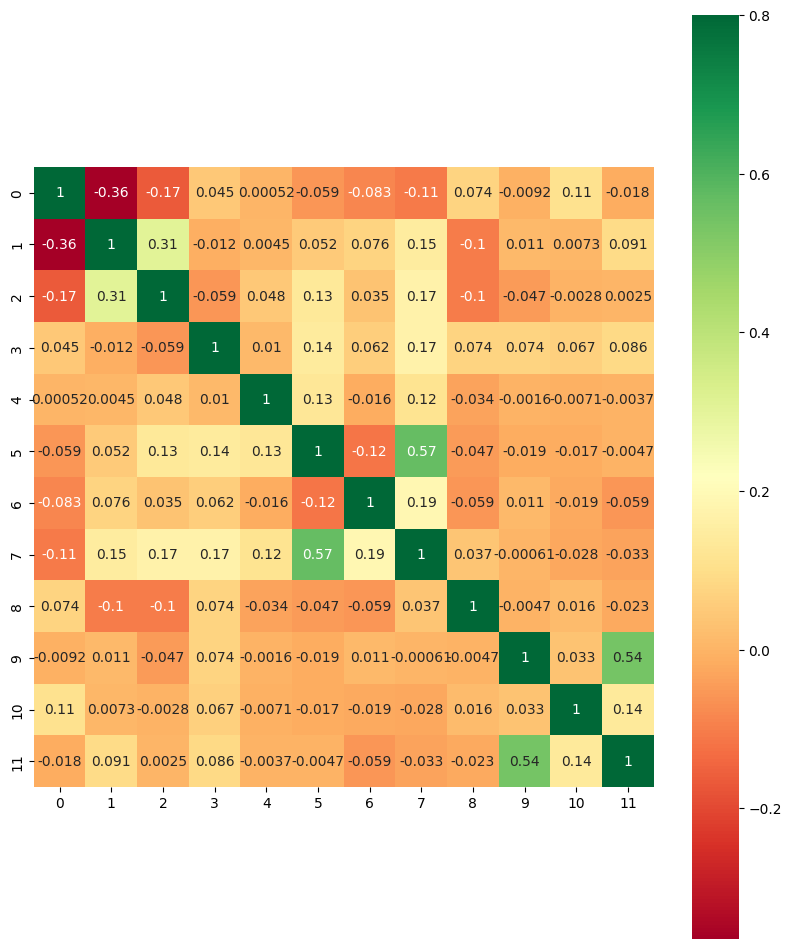

In [66]:
# Heatmap is used to provide the association among the variables in the dataset
matrix = data11.corr()
plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='RdYlGn', annot = True)


# Class Imbalance

- A dataset is imbalanced when class frequencies are highly unequal.
- Models bias toward the majority class.

#### Why resampling is needed
- Resampling modifies the training data distribution so the model can learn minority patterns.
#### Two broad strategies
- Under-sampling → reduce majority samples
- Over-sampling → increase minority samples

## Under-Sampling
- Under-sampling reduces the number of majority class samples to match the minority class size.
- Minority class → unchanged
- Majority class → reduced
#### Why Under-Sampling is used
- Faster training
- Useful for very large datasets
- Reduces model bias toward majority class
#### Types of Under-Sampling
- Random Under-Sampling
-- Randomly removes majority samples
-- Risk of losing important information
- Informed / Intelligent Under-Sampling
-- Removes only redundant or noisy samples

## Over-Sampling
- Over-sampling increases the number of minority class samples so that both classes are more balanced.
- Majority class → unchanged
- Minority class → increased
#### Why Over-Sampling is used
- Prevents the model from ignoring minority class
- Retains all majority class information
- Useful when the dataset is small or medium-sized
#### Types of Over-Sampling
- Random Over-Sampling
-- Randomly duplicates minority samples
-- Simple but can cause overfitting
- SMOTE (Synthetic Minority Oversampling Technique)
-- Creates new synthetic samples
-- Does not copy existing points
-- Uses nearest neighbors + interpolation

#### How SMOTE works (step-by-step)
- Select a minority class sample x
- Find its k nearest minority neighbors
- Randomly choose one neighbor xnn
- Generate a synthetic point: x_new = x + λ(xnn−x), λ∈(0,1)
- Repeat until the desired balance is reached

#### Simple numeric intuition
- Minority points:
- A(2, 3), B(4, 5)
- Synthetic point:𝜆=0.5
- New point = (2 + 0.5×2, 3 + 0.5×2) = (3, 4)
- This point is new, not a duplicate.

In [67]:
# Class Imbalance
data['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


In [68]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


<Axes: xlabel='count', ylabel='Loan_Status'>

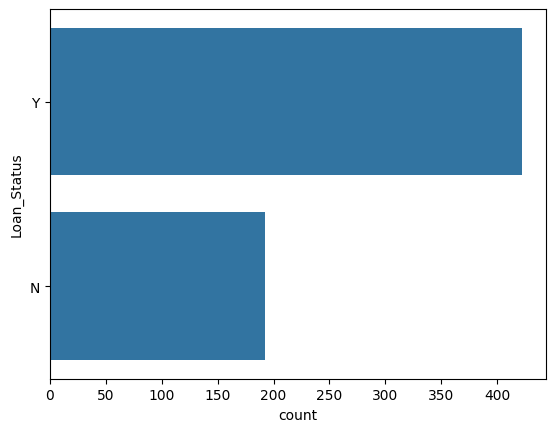

In [69]:
import seaborn as sns
sns.countplot(data['Loan_Status'])

In [70]:
# pip install imbalanced-learn

# Under Sampling

In [71]:
X = data1.drop(columns=['Loan_Status'],axis=1)   # independent variable / predictor variable / input varaible
Y = data1['Loan_Status']        # dependent variable / response variable / output variable /target variable

In [72]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X,Y)

In [73]:
from collections import Counter
print(f'Before under sampling : {Counter(Y)}')
print(f'After under sampling : {Counter(y_res)}')

Before under sampling : Counter({1: 422, 0: 192})
After under sampling : Counter({0: 192, 1: 192})


# Over Sampling

In [74]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler()
X_res1, y_res1 = over_sampler.fit_resample(X,Y)

In [75]:
print(f'Before under sampling : {Counter(Y)}')
print(f'After under sampling : {Counter(y_res1)}')

Before under sampling : Counter({1: 422, 0: 192})
After under sampling : Counter({1: 422, 0: 422})


# SMOTE Synthetic Minority Oversampling technique.

In [76]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE for traning dataset

In [77]:
smote=SMOTE(sampling_strategy='auto')

In [78]:
X_res2, Y_res2 = smote.fit_resample(X,Y)


In [79]:
print(f'Before under sampling : {Counter(Y)}')
print(f'After under sampling : {Counter(Y_res2)}')

Before under sampling : Counter({1: 422, 0: 192})
After under sampling : Counter({1: 422, 0: 422})


In [80]:
Y.shape

(614,)

In [81]:
X.shape

(614, 11)

In [82]:
X_res2.shape

(844, 11)

In [83]:
Y_res2.shape

(844,)